In [1]:
import pandas as pd
from glob import glob
import numpy as np
from aggmap import AggMap, AggModel
import seaborn as sns

import matplotlib.pyplot as plt



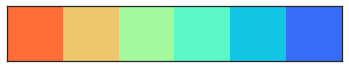

In [37]:
sns.set(style = 'white', font_scale=2)
color = sns.color_palette("rainbow_r", 6) #PiYG

color1 = [color[1], color[3]]
sns.palplot(color)

## 01-plot channel effects

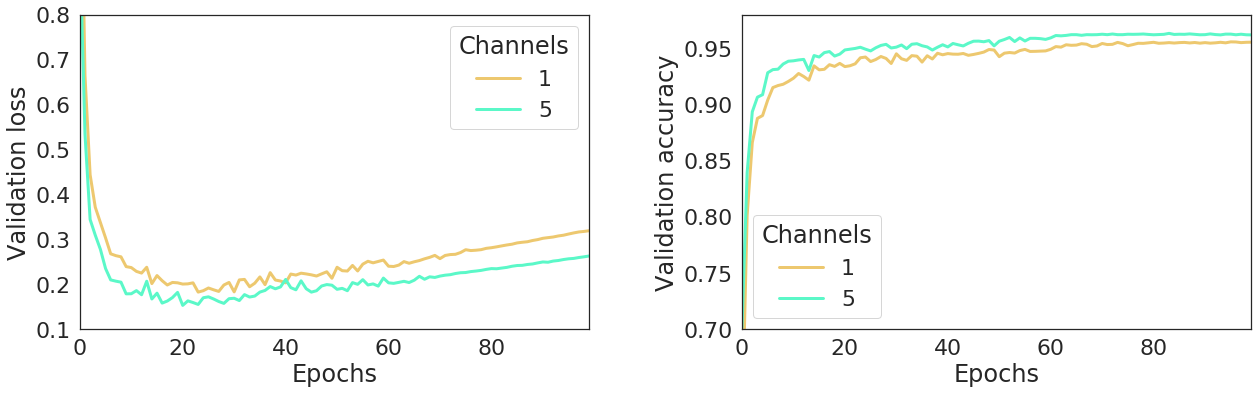

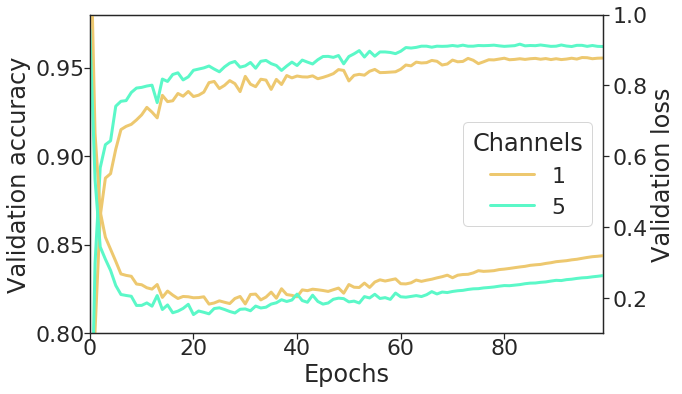

In [51]:
h1 = glob('./c1_c5_history/c1/fold_0*/history*.csv')
h5 = glob('./c1_c5_history/c5/fold_0*/history*.csv')

als=[]
for i in h1:
    als.append(pd.read_csv(i, index_col=0))

dfm1 = pd.concat(als).reset_index().groupby('index').mean()
dfm1.columns = dfm1.columns + '_C1'

als5=[]
for i in h5:
    als5.append(pd.read_csv(i, index_col=0))

dfm5 = pd.concat(als5).reset_index().groupby('index').mean()
dfm5.columns = dfm5.columns + '_C5'


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )
ax1, ax2 = axes        


loss_mean = dfm1[['val_loss_C1']].join(dfm5['val_loss_C5'])
loss_mean.columns.name = 'Channels'
loss_mean = loss_mean.rename(columns={'val_loss_C1':'1', 'val_loss_C5':'5'})

loss_mean.plot(ax=ax1, lw = 3, color = color1)
ax1.set_ylabel('Validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylim(0.1, 0.8)


acc_mean = dfm1[['val_accuracy_C1']].join(dfm5['val_accuracy_C5'])
acc_mean.columns.name = 'Channels'
acc_mean = acc_mean.rename(columns={'val_accuracy_C1':'1', 'val_accuracy_C5':'5'})
acc_mean.columns.name = 'Channels'

acc_mean.plot(ax=ax2, lw = 3, color = color1)
ax2.set_ylabel('Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylim(0.7, 0.98)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
plt.savefig('10FCV_valid_c1_c5.png', bbox_inches='tight', dpi=400)



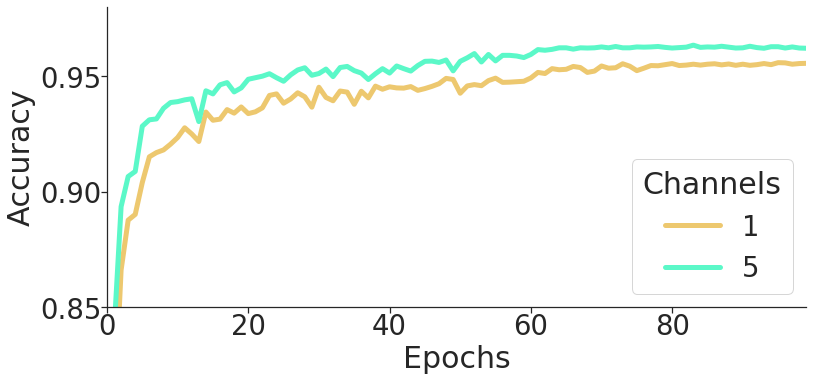

In [60]:

sns.set(style = 'white', font_scale=2.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6), sharex=False, sharey=False, )
      
acc_mean.rolling(1).mean().plot(ax=ax1, lw = 5, color = color1, legend = True, alpha =1)
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylim(0.85, 0.98)
ax1.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6, )


# ax2 = ax1.twinx()
# loss_mean.rolling(1).mean().plot(ax=ax2, lw = 3, color = color1, alpha =1)
# ax2.set_ylabel('Validation loss')
# ax2.set_xlabel('Epochs')
# ax2.set_ylim(0.1, 1)
# ax2.legend(loc= 'center right')
# ax2.get_legend().set_title("Channels")
sns.despine(top=True, right=True, left=False, bottom=False)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
#plt.savefig('10FCV_valid_c1_c5.png', bbox_inches='tight', dpi=400)


## 02-plot sample effect

In [40]:
hue = 'samples to pre-fit'
x = 'Class'
y = 'Accuracy'

In [41]:
lr = pd.read_csv('./fold_results_c5/each_class_acc.csv', index_col=0)
lr.columns=[y]
lr.index.name = x

vl = pd.read_csv('./00-very-low-sample_embd/each_class_acc_c5.csv', index_col=0)
vl.columns=[y]
vl.index.name = x



rl = pd.read_csv('./01-relative-low-sample-embd/each_class_acc_c5.csv', index_col=0)
rl.columns=[y]
rl.index.name = x


vl = vl.sort_values(y)


In [42]:
vl[hue] = '45'
rl[hue] = '317'
lr[hue] = '10446'
dfb = vl.append(lr).append(rl).reset_index()

In [43]:
slist = vl[vl[y] <= 0.90].index.tolist()
dfb = dfb[dfb[x].isin(slist)]

In [44]:
hue_order = ['45', '317','10446']

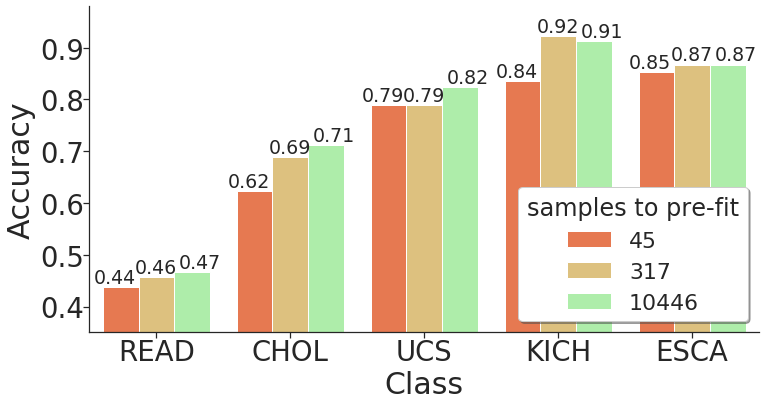

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6), sharex=False, sharey=False, )
sns.set(style = 'white', font_scale=2)
sns.barplot(data=dfb,x=x, y=y, hue=hue, ax=ax,  hue_order = hue_order, palette = color)

ax.set_xticklabels(labels = dfb[x].tolist(), rotation=0, ha='center',) # fontsize = 18

ax.legend(loc='lower right',fancybox=True,  ncol=1, title = hue,  shadow=True)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), fancybox=True, ncol = 2, shadow=True)

fontsize = 19

for i, c in enumerate(dfb['Class'].unique()):
    accs = dfb[dfb['Class'] == c].set_index('samples to pre-fit').loc[hue_order].Accuracy.tolist()
    for j, acc in enumerate(accs):
        s = "%.2f" % acc 
        if j == 0:
            ax.text(i-0.47, acc+0.008, s, fontsize = fontsize)
        if j == 1:
             ax.text(i-0.16, acc+0.008, s, fontsize = fontsize)
        if j == 2:
            ax.text(i+0.17, acc+0.008, s, fontsize = fontsize)
    

ax.set_ylim(0.35, 0.98)
sns.despine(top=True, right=True, left=False, bottom=False)
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6, )
ax.set_xlabel('Class')
plt.savefig('sample_effect_performance.pdf', bbox_inches='tight', dpi=400)
